In this problem set in the Theoretical Analytical Chemistry course (Chem 223)  of the Institute of Chemistry in the University of the Philippines Diliman, we were tasked to visualize how the concentration of the different species of a weak acid would change under different conditions (changes in pH and with the addition of a strong base).

*Created by Simond Lars Darwin G. Lenon, RCh (PhD Chemistry Student, focus on Inorganic Chemistry)*

# Problem 1

Consider a solution of weak acid HA that is 0.10 M and has a pKa of 4.40.

a.) Write the proton condition expression for this system.

b.) Let Z = log[ ]. Write the specific Z expressions for [H+], [OH-], and [A] for this system.

c.) Draw the appropriate power plot of Z vs pH (0-14), showing all three in the same plot. Indicate the system point in the plot.


For the dissociation of a weak acid, the pertinent chemical equations are:

$HA + H_2O \leftrightarrow H_3O^+ + A^- \space\space\space\space\space (K_a = \frac{[H_3O^+][A^-]}{[HA]}) $

$H_2O + H_2O \leftrightarrow  H_3O^+ + OH^- \space\space\space\space\space (K_a =[H_3O^+][OH^-]) $

Therefore, the proton condition is simply the charge balance equation.

$[H_3O^+] = [OH^-] + [A^-] $

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# constants
C = 0.10
pKa = 4.40

In [ ]:
# pH range
pH = np.linspace(0,14,1000)

To get the Z expressions, we may use the concept of pH.

$Z_{H^+} = log([H_3O^+]) = -pH $

$Z_{OH^-} = log([\frac{K_w}{[H_3O^+}]) = pH - 14 $

for $Z_{A^-}$ however, it is a bit more complicated.

Since it is a weak acid, the conjugate base $A^-$ term may be derived from the mass balance.

$C = 0.10 = [HA] + [A^-] $

$[HA] = 0.10 -[A^-] $

$[HA] = 0.10 - ([HA]\times 10^{pH - pK_a}) $ (from the Henderson-Hasselbalch Equation)
$[HA] = \frac{0.10}{1 +10^{pH - pK_a} }$

therefore $Z = \log(\frac{K_a}{[H_3O^+} \frac{0.10}{1+10^{pH - pK_a}})$


In [ ]:
#Z expressions
Z_H = -pH
Z_OH = pH - 14
Z_A = np.log10((10**(-4.40)) / (10**(-pH)) * (0.10 / (1 + 10**(pH - 4.40))))

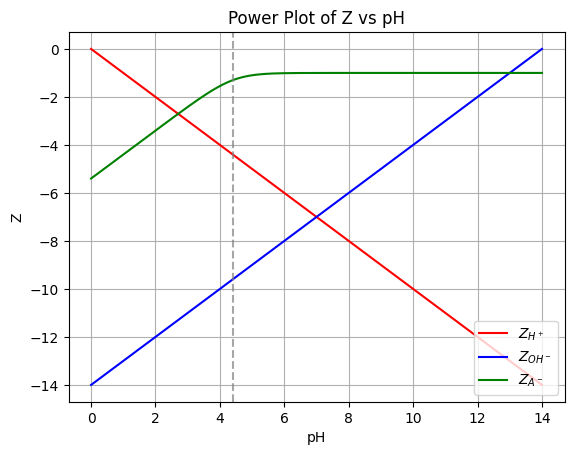

In [ ]:
# plots
plt.plot(pH, Z_H, label=r'$Z_{H^+}$', color='red')
plt.plot(pH, Z_OH, label=r'$Z_{OH^-}$', color='blue')
plt.plot(pH, Z_A, label=r'$Z_{A^-}$', color='green')
system_pH = 4.40
plt.axvline(x=system_pH, color='gray', linestyle='--', alpha=0.7)

plt.xlabel('pH')
plt.ylabel('Z')
plt.title('Power Plot of Z vs pH')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

# Problem 2

 Instead of just a simple weak acid HA, strong acid B is now added to the solution. Consider a system of weak acid HA at 0.08 M with pKa = 4.40 and added incrementally with 0.02 M NaOH (Note: The volumes are held the same, meaning the amount of NaOH added only changes in terms of moles, but does not change the overall volume)

a.) Write the proton condition expression for this system

b.) Let Z = -log[ ]. Write the specific Z expressions for [H+], [OH-], and [A] for this system. (Note a is for strong acid concentration, b is for strong base concentration)

c.) Draw the appropriate power plot for this system using Z = -log[ ]. Indicate the system point in the plot. Start with 0.00 mol added NaOH


For this problem, we still consider the dissociation of the weak acid as one of the pertinent equations.

$HA + H_2O \leftrightarrow H_3O^+ + A^- \space\space\space\space\space (K_a = \frac{[H_3O^+][A^-]}{[HA]}) $

$H_2O + H_2O \leftrightarrow  H_3O^+ + OH^- \space\space\space\space\space (K_a =[H_3O^+][OH^-]) $

However, we also consider the neutralization reaction between the strong base, $NaOH$ and the weak acid, $HA$

$HA + NaOH ↔ NaA + H_2O   $

Therefore, the proton condition is also the charge balance equation.

$[H_3O^+] = [OH^-] + [A^-] - C_{NaOH} $

In [ ]:
# constants
pKa = 4.40
C = 0.08
C_NaOH = 0.02

#relevant concentrations
M_NaOH = np.linspace(0,C,100)
C_HAunreacted = C - M_NaOH
C_Aformed = M_NaOH

C_H = M_NaOH + C_Aformed - C_NaOH

In [ ]:
# Z expressions

#Z_H = -np.log10(C_H)
Z_H = pKa + np.log10(C_Aformed/C_HAunreacted)
pH = Z_H
Z_OH = (14 - Z_H)
#Z_A = -np.log10(C_Aformed/C_HAunreacted)
#Z_A = Z_H - 4.40 + np.log10(C)
Z_A = 10**(pH-pKa) + C_HAunreacted

<ipython-input-30-b1a47b66c875>:4: RuntimeWarning: divide by zero encountered in divide
  Z_H = pKa + np.log10(C_Aformed/C_HAunreacted)
<ipython-input-30-b1a47b66c875>:4: RuntimeWarning: divide by zero encountered in log10
  Z_H = pKa + np.log10(C_Aformed/C_HAunreacted)


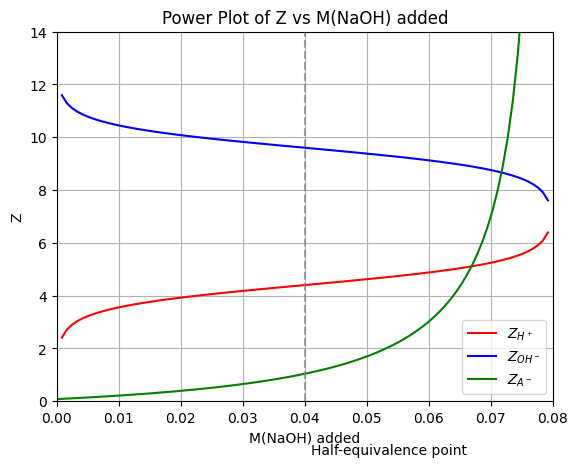

In [ ]:
# plots
plt.plot(M_NaOH, Z_H, label=r'$Z_{H^+}$', color='red')
plt.plot(M_NaOH, Z_OH, label=r'$Z_{OH^-}$', color='blue')
plt.plot(M_NaOH, Z_A, label=r'$Z_{A^-}$', color='green')
system_pH = 0.04
plt.axvline(x=system_pH, color='gray', linestyle='--', alpha=0.7)
plt.xlim(0, 0.08)
plt.ylim(0,14)
plt.text(system_pH + 0.001, -2, 'Half-equivalence point', color='black')

plt.xlabel('M(NaOH) added')
plt.ylabel('Z')
plt.title('Power Plot of Z vs M(NaOH) added')
plt.legend(loc='lower right')
plt.grid(True)

plt.show()

# Problem 2 Redo

 Instead of just a simple weak acid HA, strong acid B is now added to the solution. Consider a system of weak acid HA at 0.08 M with pKa = 4.40 and added incrementally with 0.02 M NaOH (Note: The volumes are held the same, meaning the amount of NaOH added only changes in terms of moles, but does not change the overall volume)

a.) Write the proton condition expression for this system

b.) Let Z = -log[ ]. Write the specific Z expressions for [H+], [OH-], and [A] for this system. (Note a is for strong acid concentration, b is for strong base concentration)

c.) Draw the appropriate power plot for this system using Z = -log[ ]. Indicate the system point in the plot. Start with 0.00 mol added NaOH


For this problem, we still consider the dissociation of the weak acid as one of the pertinent equations.

$HA + H_2O \leftrightarrow H_3O^+ + A^- \space\space\space\space\space (K_a = \frac{[H_3O^+][A^-]}{[HA]}) $

$H_2O + H_2O \leftrightarrow  H_3O^+ + OH^- \space\space\space\space\space (K_a =[H_3O^+][OH^-]) $

However, we also consider the neutralization reaction between the strong base, $NaOH$ and the weak acid, $HA$

$HA + NaOH ↔ NaA + H_2O   $

Therefore, the proton condition is also the charge balance equation.

$[H_3O^+] = [OH^-] + [A^-] - C_{NaOH} $

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
# constants
pKa = 4.40
Ka = 10**(-pKa)
C = 0.08
#C_NaOH = 0.02

#relevant concentrations
C_NaOH = np.linspace(0,0.16,100)
C_HA = 0.08 - C_NaOH
C_A = np.where(C_NaOH <= 0.08, C_NaOH, 0.08)
pH = pKa + np.log10(C_A/C_HA)
C_H = 10**(-pH)
C_A = C_NaOH + (Ka*C_HA/C_H)

<ipython-input-84-16c9daf1030d>:11: RuntimeWarning: divide by zero encountered in log10
  pH = pKa + np.log10(C_A/C_HA)
<ipython-input-84-16c9daf1030d>:11: RuntimeWarning: invalid value encountered in log10
  pH = pKa + np.log10(C_A/C_HA)


In [ ]:
# Z expressions
Z_H = pH
Z_OH = (14 - pH)
#Z_A = -np.log10(C_A)
Z_A = -(pH - pKa + np.log10(C_HA))
Z_HA = -np.log10(C_HA)

<ipython-input-97-1a0c44e05803>:5: RuntimeWarning: invalid value encountered in log10
  Z_A = -(pH - pKa + np.log10(C_HA))
<ipython-input-97-1a0c44e05803>:6: RuntimeWarning: invalid value encountered in log10
  Z_HA = -np.log10(C_HA)


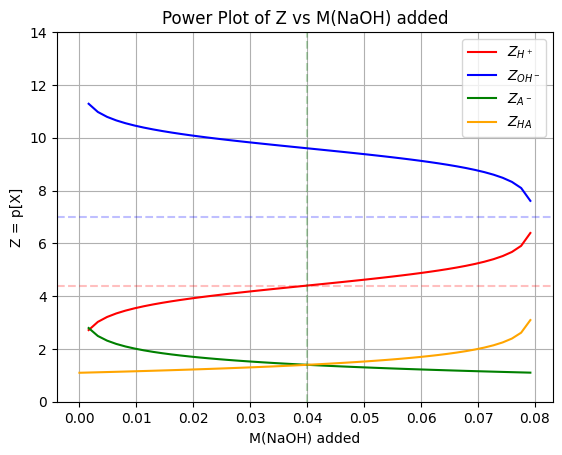

In [ ]:
# plots
plt.plot(C_NaOH, Z_H, label=r'$Z_{H^+}$', color='red')
plt.plot(C_NaOH, Z_OH, label=r'$Z_{OH^-}$', color='blue')
plt.plot(C_NaOH, Z_A, label=r'$Z_{A^-}$', color='green')
plt.plot(C_NaOH, Z_HA, label=r'$Z_{HA}$', color='orange')

#plot additions
system_pH = 0.04
plt.axvline(x=system_pH, color='green', linestyle='--', alpha=0.25)
plt.axhline(y=pKa, color='red', linestyle='--', alpha=0.25)
plt.axhline(y=7, color='blue', linestyle='--', alpha=0.25)
#plt.text(0.0125, 2, 'Half-equivalence point', color='black')
#plt.text(0.0415, 5, '$pK_a = pH = Z_{H^+}$', color='black')
#plt.text(0.0415, 7.25, 'pH = 7', color='black')
#plt.xlim(0, 0.08)
plt.ylim( 0,14)
#plt.ylim(0,7)

plt.xlabel('M(NaOH) added')
plt.ylabel('Z = p[X]')
plt.title('Power Plot of Z vs M(NaOH) added')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()